In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.panel import PanelOLS

In [2]:
df = pd.read_excel('Data Finale_balanced1.xlsx')
df.head()

,Country,Year,Monthly Minimum Wage,CollectiveBargain_Coverage,TradeUnions_Density,Real Average Annual Wage Growth,Annual Inflation CPI,Gini Index,Labour force participation rate (Women age 15 to 64),Unemployment rate (Women age 15 to 64),...,"Children out of school, primary",Current health expenditure (% of GDP),Exports of goods and services (annual % growth),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)",Imports of goods and services (% of GDP),"Labor force, total",Labor tax and contributions (% of commercial profits),"Part time employment, total (% of total employment)",GDP (current US$)
0,Austria,1990,0.0,98.0,46.8,3.13,3.26,30.8,61.32,4.01,...,4616,9.2,8.57,0.39,1.02,35.79,3569407,35.3,20.4,1.664634e+11
1,Austria,1991,0.0,98.0,45.5,3.13,3.34,30.8,61.32,4.01,...,4616,9.2,2.94,0.21,0.74,35.46,3569407,35.3,20.4,1.737942e+11
2,Austria,1992,0.0,98.0,44.5,2.01,4.02,30.8,61.32,4.01,...,4616,9.2,1.32,0.76,0.90,34.47,3652067,35.3,20.4,1.950781e+11
3,Austria,1993,0.0,98.0,44.0,0.82,3.63,30.8,61.32,4.01,...,4616,9.2,-2.37,0.59,0.62,31.80,3684501,35.3,20.4,1.903797e+11
4,Austria,1994,0.0,98.0,41.5,1.01,2.95,30.8,61.32,4.01,...,4616,9.2,5.69,1.02,0.61,33.83,3851283,35.3,20.4,2.035352e+11


In [2]:
df = pd.read_excel('Data Finale_balanced_withMinimumWage.xlsx')
df.head()

,Country,Year,Monthly Minimum Wage,CollectiveBargain_Coverage,TradeUnions_Density,Real Average Annual Wage Growth,Annual Inflation CPI,Gini Index,Employment/population ratio Women age 15 to 64,Labour force participation rate (Women age 15 to 64),...,"Children out of school, primary",Current health expenditure (% of GDP),Exports of goods and services (annual % growth),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)",Imports of goods and services (% of GDP),"Labor force, total",Labor tax and contributions (% of commercial profits),"Part time employment, total (% of total employment)",GDP (current US$)
0,Austria,1990,0.0,98.0,46.8,3.13,3.26,30.8,NaN,61.32,...,4616,9.2,8.57,0.39,1.02,35.79,3569407,35.3,20.4,1.664634e+11
1,Austria,1991,0.0,98.0,45.5,3.13,3.34,30.8,NaN,61.32,...,4616,9.2,2.94,0.21,0.74,35.46,3569407,35.3,20.4,1.737942e+11
2,Austria,1992,0.0,98.0,44.5,2.01,4.02,30.8,NaN,61.32,...,4616,9.2,1.32,0.76,0.90,34.47,3652067,35.3,20.4,1.950781e+11
3,Austria,1993,0.0,98.0,44.0,0.82,3.63,30.8,NaN,61.32,...,4616,9.2,-2.37,0.59,0.62,31.80,3684501,35.3,20.4,1.903797e+11
4,Austria,1994,0.0,98.0,41.5,1.01,2.95,30.8,NaN,61.32,...,4616,9.2,5.69,1.02,0.61,33.83,3851283,35.3,20.4,2.035352e+11


In [3]:
df.rename(columns={
    "Labor force, total": "Labor_force",
    "GDP (current US$)": "GDP",
    "Annual Inflation CPI": "Inflation",
    "Real Average Annual Wage Growth": "WageGrowth",
    "Labour force participation rate (Women age 15 to 64)": "Female_Workers",
    "Trade unions density": "TradeUnions_Density",
    "Central government debt, total (% of GDP)": "Gov_debt",
    "Unemployment rate (Women age 15 to 64)": "WomenUnemployment_rate",
    "Current health expenditure (% of GDP)": "Health_expenditure",
    "Exports of goods and services (annual % growth)": "Exports_growth",
    "Imports of goods and services (% of GDP)": "Imports_growth",
    "Foreign direct investment, net inflows (% of GDP)": "FDI_inflow",
    "Foreign direct investment, net outflows (% of GDP)": "FDI_outflow",
    "Labor tax and contributions (% of commercial profits)": "Tax_contribution",
    "Part time employment, total (% of total employment)": "Parttime_employment"
}, inplace=True)
df.reset_index(inplace=True)
print(df.columns)

Index(['index', 'Country', 'Year', 'Monthly Minimum Wage',
       'CollectiveBargain_Coverage', 'TradeUnions_Density', 'WageGrowth',
       'Inflation', 'Gini Index', 'Female_Workers', 'WomenUnemployment_rate',
       'Gov_debt', 'Children out of school, primary', 'Health_expenditure',
       'Exports_growth', 'FDI_inflow', 'FDI_outflow', 'Imports_growth',
       'Labor_force', 'Tax_contribution', 'Parttime_employment', 'GDP'],
      dtype='object')


## Variable engineering

In [4]:
df['lnGDP'] = np.log(df['GDP'])
df['lnGDP'].round(2)
df['minwage'] = (df['Monthly Minimum Wage'] > 0).any()
df['minwage'] = df['minwage'].astype(int)

# Data Visualisation

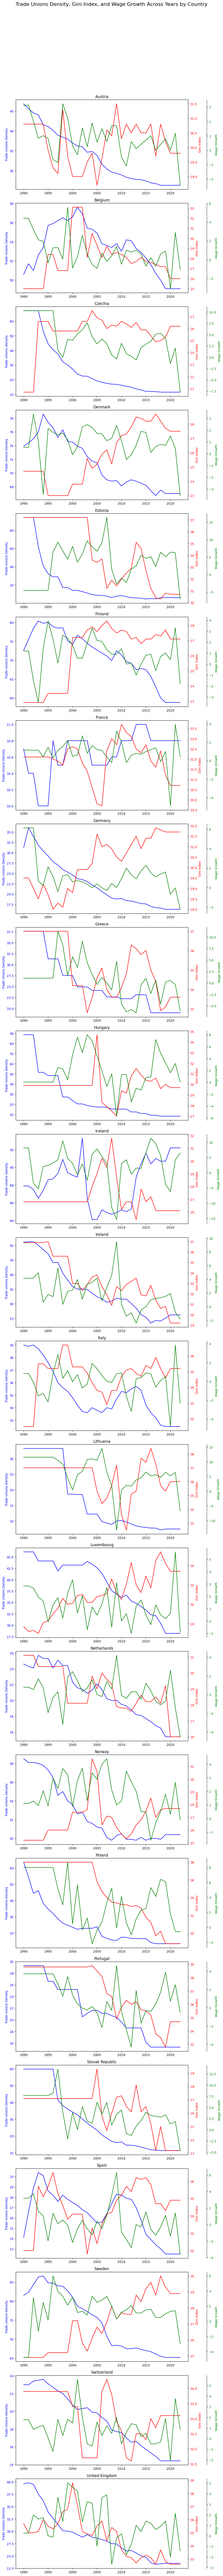

In [5]:
countries = df['Country'].unique()

fig, axs = plt.subplots(len(countries), 1, figsize=(10, 5 * len(countries)))

if len(countries) == 1:
    axs = [axs]

for ax, country in zip(axs, countries):
    data = df[df['Country'] == country]

    ax.plot(data['Year'], data['TradeUnions_Density'], color='blue', label='Trade Unions Density')
    ax.set_ylabel('Trade Unions Density', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    ax2 = ax.twinx()
    ax2.plot(data['Year'], data['Gini Index'], color='red', label='Gini Index')
    ax2.set_ylabel('Gini Index', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 60))  
    ax3.plot(data['Year'], data['WageGrowth'], color='green', label='Wage Growth')
    ax3.set_ylabel('Wage Growth', color='green')
    ax3.tick_params(axis='y', labelcolor='green')
    
    ax.set_title(country)

plt.suptitle('Trade Unions Density, Gini Index, and Wage Growth Across Years by Country', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Correlation Matrix

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


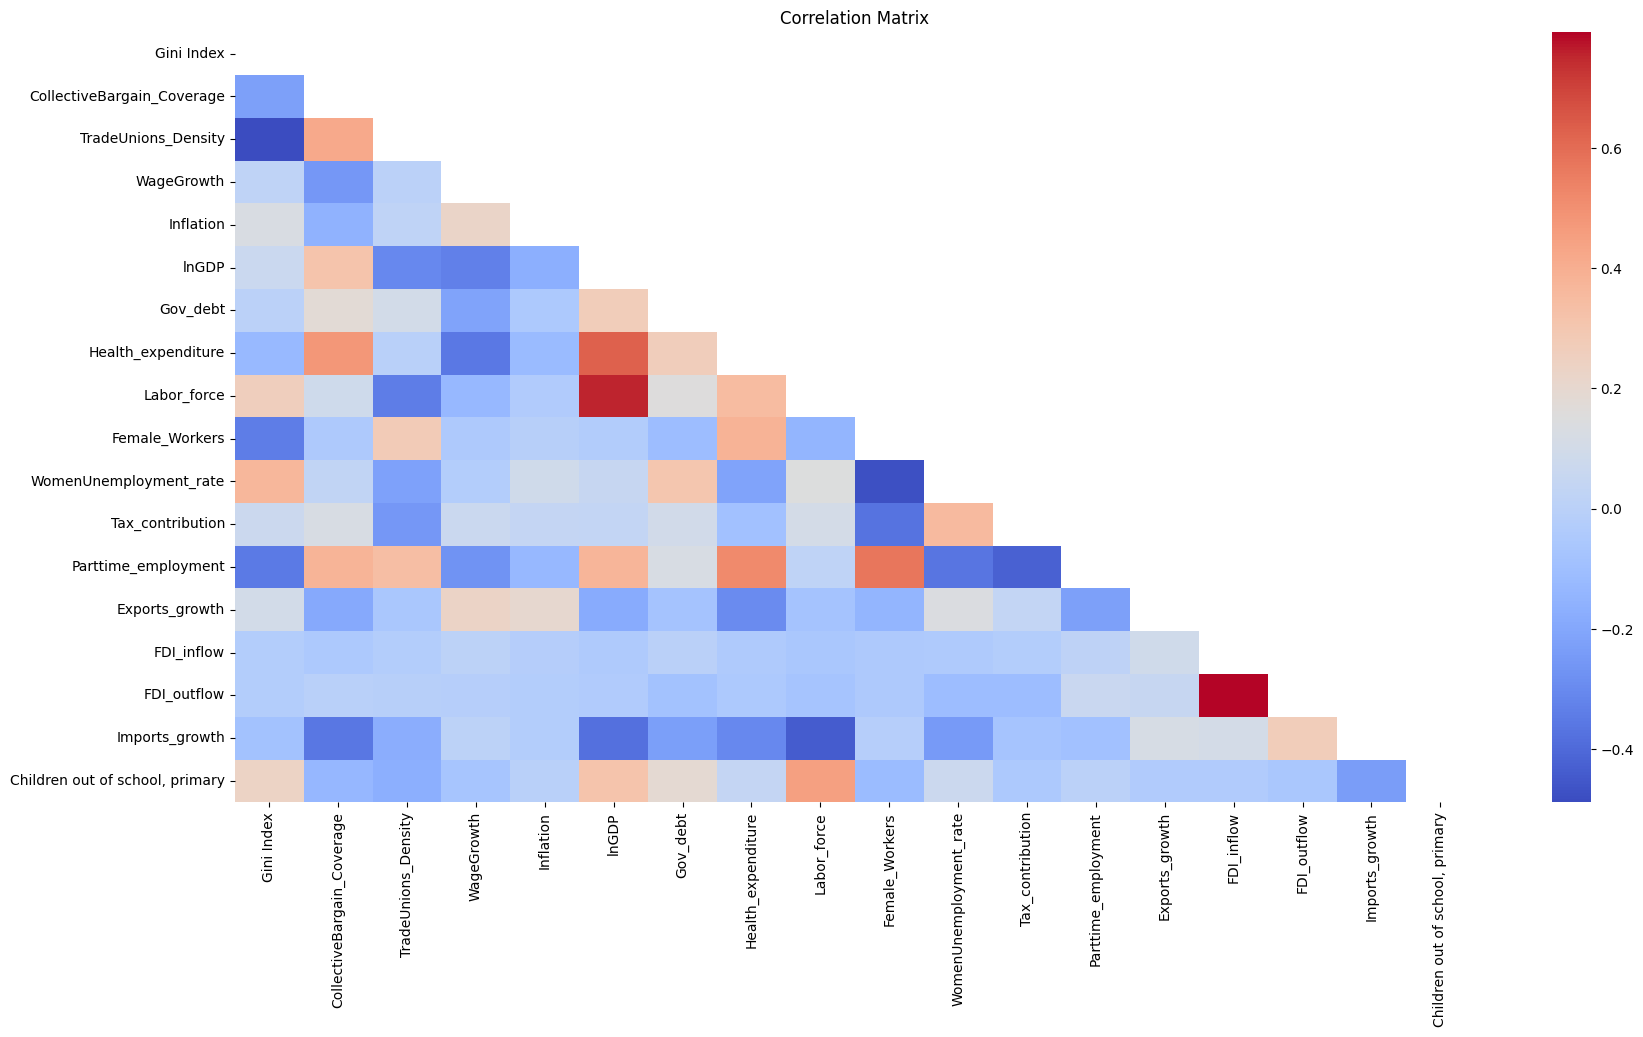

In [6]:
variables = ['Gini Index', 'CollectiveBargain_Coverage', 'TradeUnions_Density', 'WageGrowth',
             'Inflation', 'lnGDP', 'Gov_debt', 'Health_expenditure',
             'Labor_force', 'Female_Workers', 'WomenUnemployment_rate',
             'Tax_contribution', 'Parttime_employment',
             'Exports_growth', 'FDI_inflow', 'FDI_outflow', 'Imports_growth',
             'Children out of school, primary']
df_small = df[variables]
corr_matrix = df_small.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

# Relation between Coverage and Density over time

In [7]:
countries = df['Country'].unique()

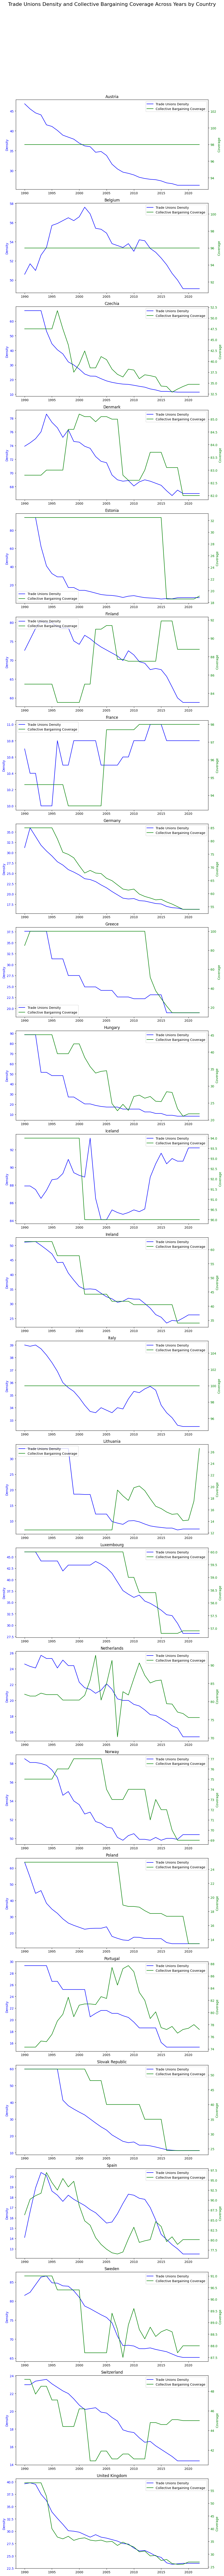

In [8]:
fig, axs = plt.subplots(len(countries), 1, figsize=(10, 5 * len(countries)), squeeze=False)  # Ensuring axs is always a 2D array

for ax, country in zip(axs.flatten(), countries):  # Use flatten() to iterate correctly over axs
    data = df[df['Country'] == country]

    # Plotting Trade Unions Density
    ax.plot(data['Year'], data['TradeUnions_Density'], color='blue', label='Trade Unions Density')
    ax.set_ylabel('Density', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    # Plotting Collective Bargaining Coverage on a secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(data['Year'], data['CollectiveBargain_Coverage'], color='green', label='Collective Bargaining Coverage')
    ax2.set_ylabel('Coverage', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    # Adding a legend to each subplot for clarity
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    ax.set_title(country)

plt.suptitle('Trade Unions Density and Collective Bargaining Coverage Across Years by Country', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Regression

In [9]:
# Define your independent variables for each regression
model1 = ['CollectiveBargain_Coverage', 'Inflation', 'WageGrowth', 'minwage']
model2 = ['CollectiveBargain_Coverage', 'Inflation', 'WageGrowth', 'minwage', 'TradeUnions_Density']
model3 = ['CollectiveBargain_Coverage', 'Inflation', 'WageGrowth', 'minwage', 'TradeUnions_Density', 'lnGDP', 'Gov_debt', 'Health_expenditure']
model4 = ['CollectiveBargain_Coverage', 'Inflation', 'WageGrowth', 'minwage', 'TradeUnions_Density', 'lnGDP', 'Gov_debt', 'Health_expenditure', 'Labor_force', 'Female_Workers', 'Parttime_employment', 'WomenUnemployment_rate']
model5 = ['CollectiveBargain_Coverage', 'Inflation', 'WageGrowth', 'minwage', 'TradeUnions_Density', 'lnGDP', 'Gov_debt', 'Health_expenditure', 'Labor_force', 'Female_Workers', 'Parttime_employment', 'WomenUnemployment_rate', 'Exports_growth', 'Imports_growth']
model6 = ['CollectiveBargain_Coverage', 'Inflation', 'WageGrowth', 'minwage', 'TradeUnions_Density', 'lnGDP', 'Gov_debt', 'Health_expenditure', 'Labor_force', 'Female_Workers', 'Parttime_employment', 'WomenUnemployment_rate', 'Exports_growth', 'Imports_growth', 'FDI_inflow', 'FDI_outflow', 'Tax_contribution']

# List of all independent variables
modelli = [model1, model2, model3, model4, model5, model6]


In [10]:
# Define the order of the variables
regressor_order = ['CollectiveBargain_Coverage', 'Inflation', 'WageGrowth', 'minwage', 'TradeUnions_Density', 'lnGDP', 'Gov_debt', 'Health_expenditure']

# List to store models
models = []

# Run each regression
for i, independent_vars in enumerate(modelli, start=1):
    X = sm.add_constant(df[independent_vars])  # Add a constant to the independent variables
    y = df['Gini Index']

    model = sm.OLS(y, X).fit()
    models.append(model)

# Create a summary table of all models
summary_table = summary_col(models, stars=True, float_format='%0.2f',
                            model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5','Model 6'],
                            info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                                       'R2':lambda x: "{:.2f}".format(x.rsquared)},
                            regressor_order=regressor_order)
summary_table

,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
CollectiveBargain_Coverage,-0.03***,0.00,0.01**,-0.01,-0.01*,0.00
,(0.01),(0.01),(0.01),(0.01),(0.01),(0.01)
Inflation,0.01***,0.01***,0.01***,0.00***,0.00***,0.00***
,(0.00),(0.00),(0.00),(0.00),(0.00),(0.00)
WageGrowth,-0.08*,-0.01,-0.05,-0.06,-0.09**,-0.08*
,(0.04),(0.04),(0.04),(0.04),(0.04),(0.04)
minwage,33.12***,33.95***,39.31***,62.00***,68.64***,69.47***
,(0.39),(0.35),(2.72),(4.47),(4.64),(4.52)
TradeUnions_Density,,-0.09***,-0.10***,-0.07***,-0.08***,-0.10***
,,(0.01),(0.01),(0.01),(0.01),(0.01)


## Fixed Effects on Years and Country


In [23]:
models_results = []

for i, independent_vars in enumerate(modelli, start=1):
    X = df[independent_vars]
    y = df['Gini Index']
    X = sm.add_constant(X)

    model = PanelOLS(y, X, entity_effects=True, time_effects=True).fit()
    models_results.append(model)

# Print the summary of each model
for i, model in enumerate(models_results, start=1):
    print(f"Model {i}:\n")
    print(model.summary)
    print("\n\n")

Model 1:

                          PanelOLS Estimation Summary                           
Dep. Variable:             Gini Index   R-squared:                        0.0321
Estimator:                   PanelOLS   R-squared (Between):             -0.1859
No. Observations:                 792   R-squared (Within):               0.0382
Date:                Sun, Mar 17 2024   R-squared (Overall):             -0.1442
Time:                        21:50:18   Log-likelihood                   -1533.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.1019
Entities:                          24   P-value                           0.0000
Avg Obs:                       33.000   Distribution:                   F(3,733)
Min Obs:                       33.000                                           
Max Obs:                       33.000   F-statistic (robust):             8.1019
                  

In [12]:
summary_data = []

for i, result in enumerate(models_results, start=1):
    # Basic statistics
    r2 = result.rsquared
    n = result.nobs
    model_name = f"Model {i}"
    
    for var in result.params.index:
        coef = result.params[var]
        std_err = result.std_errors[var]
        summary_data.append({
            'Model': model_name,
            'Variable': var,
            'Coefficient': coef,
            'Std. Error': std_err,
            'R-squared': r2,
            'Observations': n
        })

summary_df = pd.DataFrame(summary_data)
summary_pivot = summary_df.pivot(index='Variable', columns='Model', values=['Coefficient', 'Std. Error', 'R-squared', 'Observations'])
summary_pivot

Coefficient                                        
Model                          Model 1    Model 2     Model 3       Model 4   
Variable                                                                      
CollectiveBargain_Coverage    0.032659   0.028504    0.031148  2.792622e-02  \
Exports_growth                     NaN        NaN         NaN           NaN   
FDI_inflow                         NaN        NaN         NaN           NaN   
FDI_outflow                        NaN        NaN         NaN           NaN   
Female_Workers                     NaN        NaN         NaN -3.728971e-02   
Gov_debt                           NaN        NaN   -0.011391 -1.529188e-02   
Health_expenditure                 NaN        NaN   -0.144638 -9.499191e-02   
Imports_growth                     NaN        NaN         NaN           NaN   
Inflation                     0.002560   0.002176    0.001003  8.469516e-04   
Labor_force                        NaN        NaN         NaN  4.755673e-08   
Parttime_employment                NaN        NaN         NaN  2.431214e-02   
Tax_contribution                   NaN        NaN         NaN           NaN   
TradeUnions_Density                NaN   0.031061   -0.005847  7.525085e-03   
WageGrowth                   -0.029494  -0.025718   -0.047455 -3.197019e-02   
WomenUnemployment_rate             NaN        NaN         NaN  1.107234e-01   
lnGDP                              NaN        NaN   -3.209904 -2.524138e+00   
minwage                      28.824746  27.978153  114.968104  9.681941e+01   

                                                       Std. Error             
Model                            Model 5       Model 6    Model 1   Model 2   
Variable                                                                      
CollectiveBargain_Coverage  3.044561e-02  3.153389e-02   0.007616  0.007628  \
Exports_growth             -3.212772e-02 -2.969927e-02        NaN       NaN   
FDI_inflow                           NaN -9.563617e-03        NaN       NaN   
FDI_outflow                          NaN  9.517474e-03        NaN       NaN   
Female_Workers             -8.820084e-02 -1.013004e-01        NaN       NaN   
Gov_debt                   -1.475807e-02 -1.363730e-02        NaN       NaN   
Health_expenditure          3.951004e-02  6.115670e-02        NaN       NaN   
Imports_growth              6.569950e-02  6.470101e-02        NaN       NaN   
Inflation                   1.046442e-03  1.072541e-03   0.000974  0.000971   
Labor_force                 2.064362e-07  2.158722e-07        NaN       NaN   
Parttime_employment         2.182409e-02  2.140077e-02        NaN       NaN   
Tax_contribution                     NaN -1.029390e-01        NaN       NaN   
TradeUnions_Density         1.943837e-02  2.767446e-02        NaN  0.008232   
WageGrowth                 -1.691995e-02 -1.474514e-02   0.023144  0.022960   
WomenUnemployment_rate      1.398571e-01  1.482871e-01        NaN       NaN   
lnGDP                      -2.723911e+00 -2.426954e+00        NaN       NaN   
minwage                     9.890436e+01  9.419048e+01   0.500944  0.544823   

                                                     ... R-squared             
Model                         Model 3       Model 4  ...   Model 3   Model 4   
Variable                                             ...                       
CollectiveBargain_Coverage   0.008225  8.329848e-03  ...  0.136132  0.165879  \
Exports_growth                    NaN           NaN  ...       NaN       NaN   
FDI_inflow                        NaN           NaN  ...       NaN       NaN   
FDI_outflow                       NaN           NaN  ...       NaN       NaN   
Female_Workers                    NaN  2.177010e-02  ...       NaN  0.165879   
Gov_debt                     0.003980  4.172860e-03  ...  0.136132  0.165879   
Health_expenditure           0.100424  1.037193e-01  ...  0.136132  0.165879   
Imports_growth                    NaN           NaN  ...       Na

## Instrumental Variable: minimum wage

In [25]:
df['minwage'] = (df['Monthly Minimum Wage'] > 0).astype(bool)

In [40]:
from linearmodels.iv import IVGMM
from linearmodels.iv import IV2SLS


In [47]:
# Define your dependent variable
dependent_var = df['Gini Index']

# Define your independent variables
independent_vars = df[['CollectiveBargain_Coverage', 'TradeUnions_Density', 'WageGrowth',
                       'Inflation', 'lnGDP', 'Gov_debt', 'Health_expenditure',
                       'Labor_force', 'Female_Workers', 'WomenUnemployment_rate',
                       'Tax_contribution', 'Parttime_employment',
                       'Exports_growth', 'FDI_inflow', 'FDI_outflow', 'Imports_growth',
                       'Children out of school, primary']]

instrument = df[['minwage']]

independent_vars = sm.add_constant(independent_vars)

modelIV = IVGMM(dependent_var, independent_vars, instruments=instrument, 
                entity_effects=True, time_effects=True, endog=instrument['minwage'])
result = modelIV.fit()

print(result.summary)

TypeError: __init__() got an unexpected keyword argument 'entity_effects'